In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.dropna()
data = data.loc[~data.duplicated()]
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


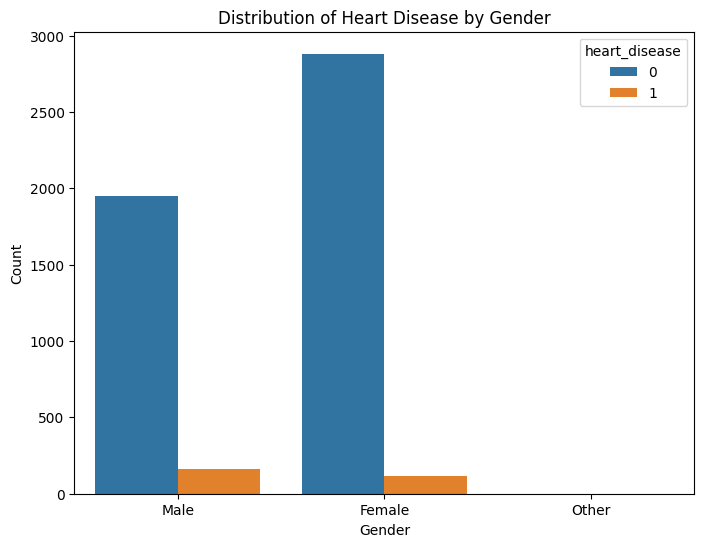

In [4]:

# Bar chart for gender and heart disease

#The bar chart shows that both males and females without heart disease form the majority in their respective groups, 
# but females have a higher overall count. The incidence of heart disease is relatively low across all genders, 
# with a slightly higher occurrence in males compared to females.

plt.figure(figsize=(8,6))
sns.countplot(data=data, x='gender', hue='heart_disease')
plt.title('Distribution of Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


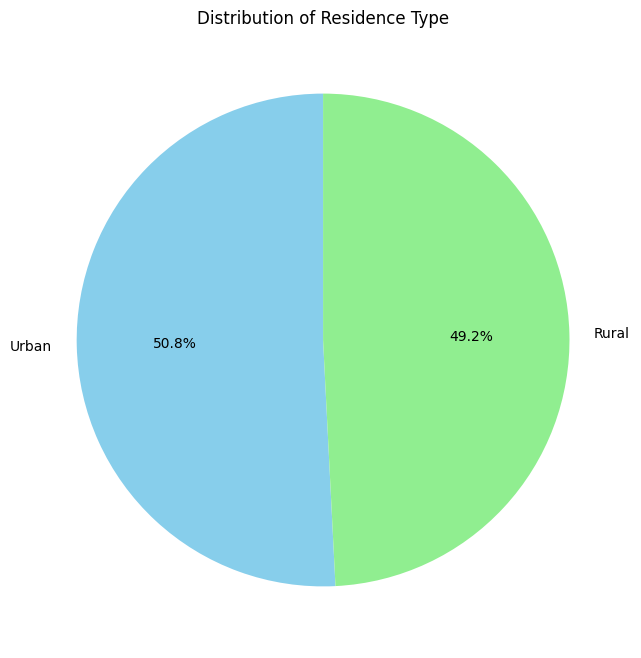

In [7]:
# Pie chart for Residence type

#The pie chart shows a nearly equal distribution between individuals from urban (50.8%) and rural (49.2%) areas, 
# indicating that the dataset has a balanced representation of both residence types.


residence_counts = data['Residence_type'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(residence_counts, labels=residence_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Residence Type')
plt.show()


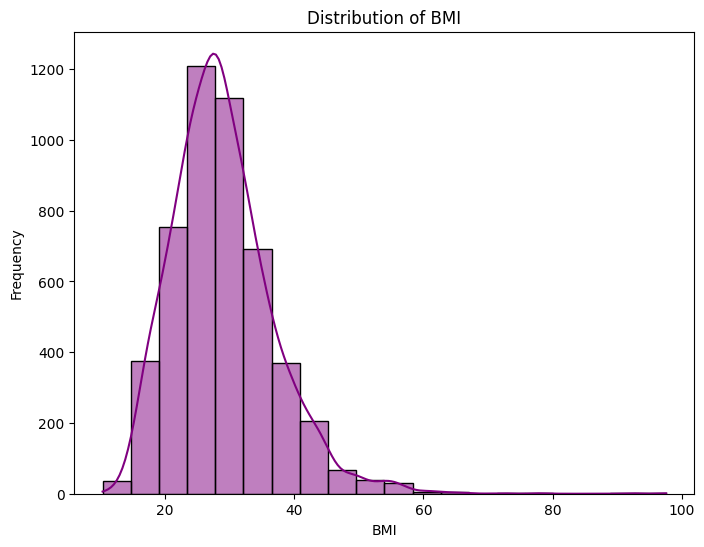

In [8]:
# Histogram for BMI
#The histogram of BMI shows a right-skewed distribution, indicating that a majority of individuals in the dataset have a BMI below the average
#This suggests a potential need for interventions to address obesity and overweight in the population.


plt.figure(figsize=(8,6))
sns.histplot(data['bmi'].dropna(), bins=20, kde=True, color='purple')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


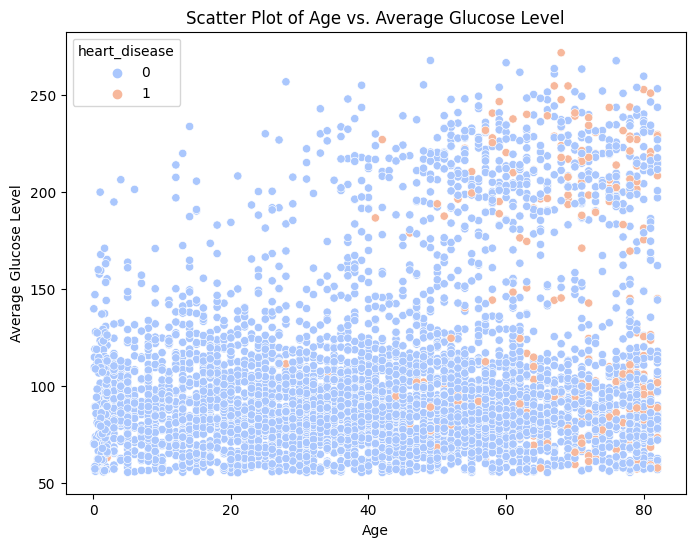

In [9]:
# Scatter plot for Age vs. Average Glucose Level
# The scatter plot suggests a weak positive correlation between age and average glucose level, 
# with some overlap between individuals with and without heart disease. 
# However, there are also outliers and individual variations, 
# indicating that age alone may not be a strong predictor of heart disease risk.

plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='age', y='avg_glucose_level', hue='heart_disease', palette='coolwarm')
plt.title('Scatter Plot of Age vs. Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()


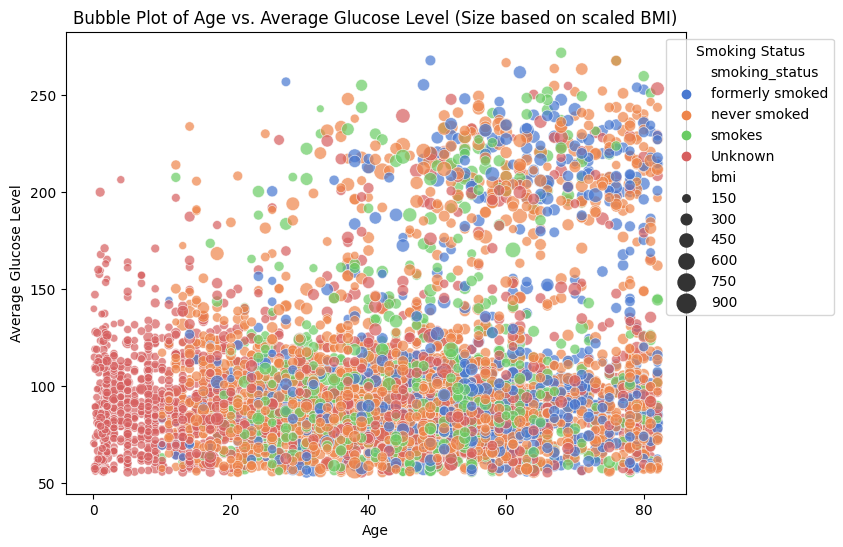

In [13]:
# Bubble plot for Age vs. Average Glucose Level with scaled BMI as size

# The bubble plot indicates a general trend of increasing average glucose levels with age, 
# with individuals who smoke or have a higher BMI tending to have higher glucose levels, 
# although there are exceptions and individual variations.

scaled_bmi = data['bmi'] / data['bmi'].max() * 100 
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='age', y='avg_glucose_level', size=scaled_bmi, sizes=(20, 200), hue='smoking_status', palette='muted', alpha=0.7)
plt.title('Bubble Plot of Age vs. Average Glucose Level (Size based on scaled BMI)')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title="Smoking Status")
plt.show()



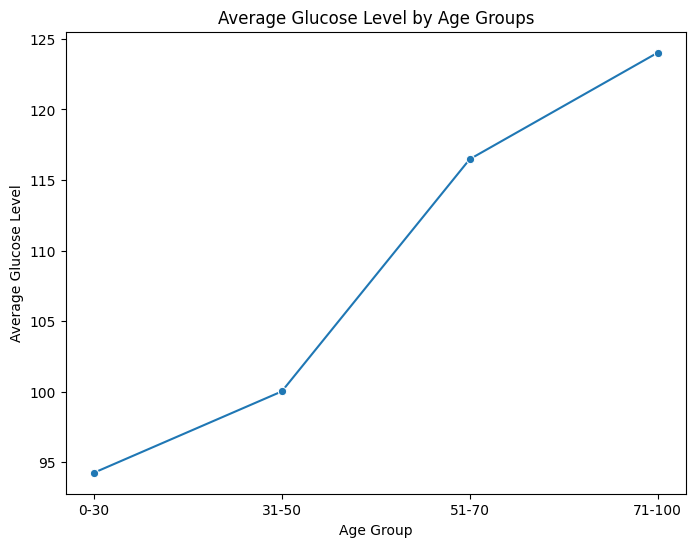

In [5]:
# Line chart for Age groups vs. Average Glucose Level

# The line chart shows a general trend of increasing average glucose levels with age,
#  with a significant increase from the 51-70 age group to the 71-100 age group.

age_groups = pd.cut(data['age'], bins=[0, 30, 50, 70, 100], labels=['0-30', '31-50', '51-70', '71-100'])
avg_glucose_by_age = data.groupby(age_groups)['avg_glucose_level'].mean().reset_index()


plt.figure(figsize=(8,6))
sns.lineplot(data=avg_glucose_by_age, x='age', y='avg_glucose_level', marker='o')
plt.title('Average Glucose Level by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Glucose Level')
plt.show()


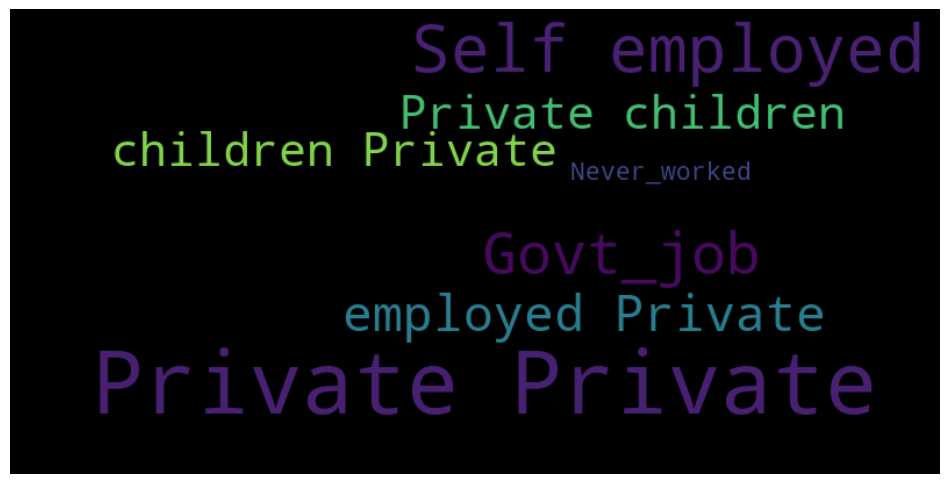

In [44]:
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression 

# Word Cloud

#The word cloud suggests that "Private" is the most common work type in the dataset, 
# followed by "children" and "Self employed".

text = " ".join(data['work_type'].astype(str))
wordcloud = WordCloud(width=800, height=400, random_state=42).generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

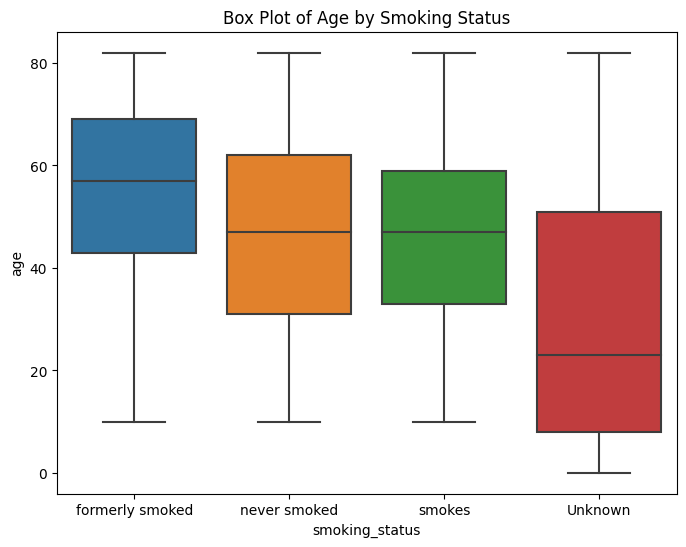

In [7]:
# Box Plot
#The box plot shows that the median age of individuals who have never smoked is higher than 
# those who have smoked or are currently smoking, while the median age of those with unknown 
# smoking status is the lowest.

plt.figure(figsize=(8, 6))
sns.boxplot(x='smoking_status', y='age', data=data)
plt.title('Box Plot of Age by Smoking Status')
plt.show()

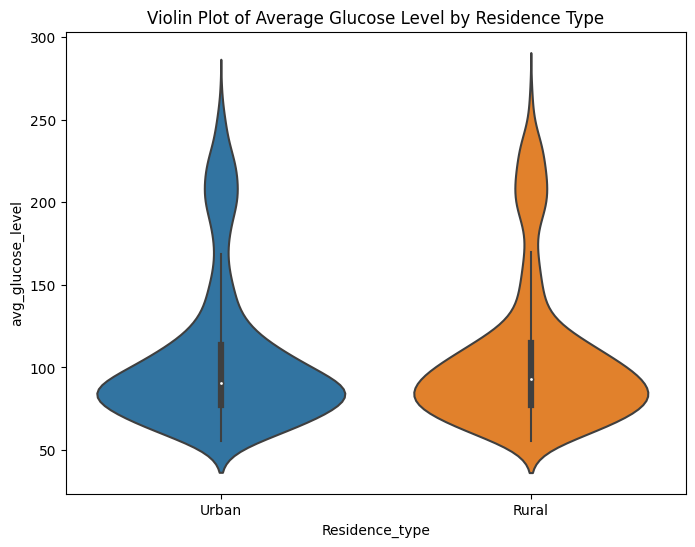

In [8]:
# Violin Plot
#The violin plot indicates that the average glucose level is generally higher in 
# urban areas compared to rural areas, with a wider distribution of glucose levels in urban areas.

plt.figure(figsize=(8, 6))
sns.violinplot(x='Residence_type', y='avg_glucose_level', data=data)
plt.title('Violin Plot of Average Glucose Level by Residence Type')
plt.show()

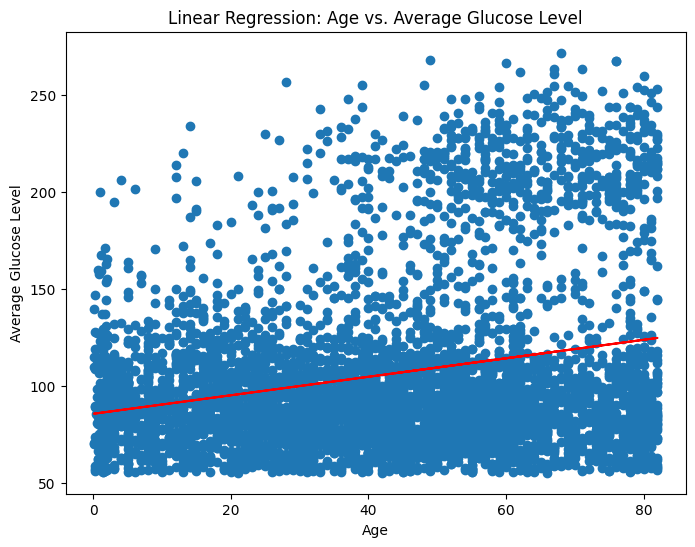

In [9]:
# Linear Regression

#The linear regression plot shows a weak positive correlation between age and average glucose level, 
# indicating that as age increases, the average glucose level tends to rise slightly, 
# but with significant individual variation.

X = data[['age']]
y = data['avg_glucose_level']
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.plot(X, predictions, color='red')
plt.title('Linear Regression: Age vs. Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

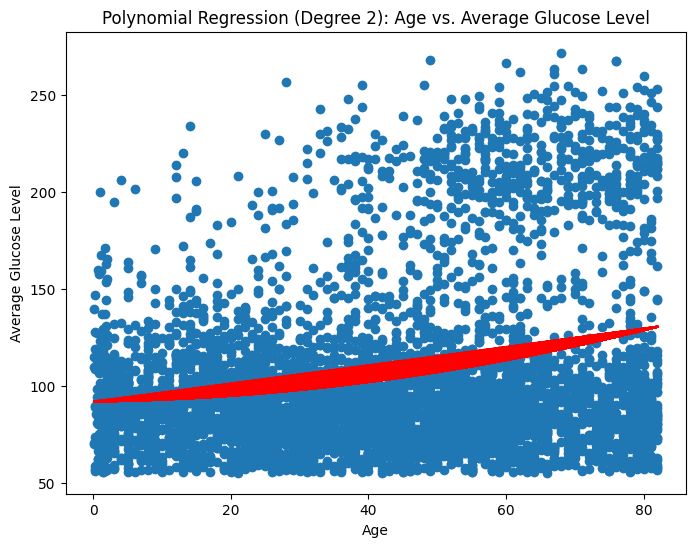

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression  

# Nonlinear Regression (Polynomial)
#The polynomial regression plot (degree 2) suggests a slightly non-linear relationship between 
# age and average glucose level, with a slight increase in glucose levels at older ages, 
# although the relationship is not very strong.

degree = 2  
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

predictions = model.predict(X_poly)
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.plot(X, predictions, color='red')
plt.title('Polynomial Regression (Degree {}): Age vs. Average Glucose Level'.format(degree))
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

In [30]:
import plotly.graph_objects as go

# 3D Scatter Plot: Age, Average Glucose Level, and BMI
# The 3D scatter plot shows a clustering of data points in the lower ranges of age, 
# average glucose level, and BMI, with a few outliers in the higher ranges. 
# This suggests a general trend towards lower values for these variables in the dataset.

fig = go.Figure(data=[go.Scatter3d(x=data['age'], y=data['avg_glucose_level'], z=data['bmi'],
                                   mode='markers', marker=dict(size=1, color='blue'))])
fig.update_layout(title='3D Scatter Plot: Age, Average Glucose Level, and BMI')
fig.show()

In [16]:
df = data

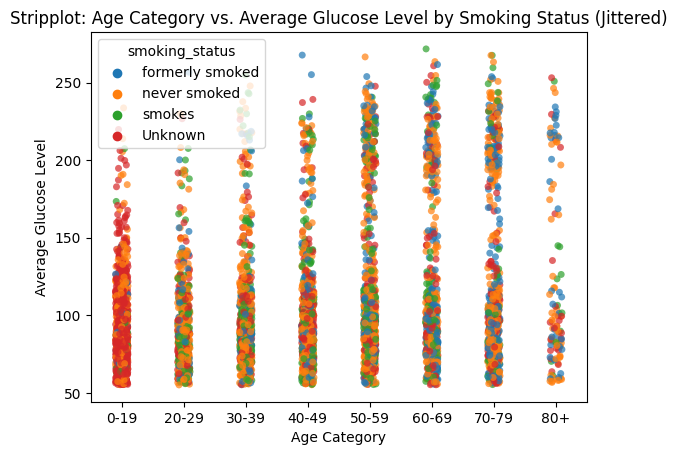

In [37]:
import pandas as pd
import seaborn as sns


data['age_category'] = pd.cut(data['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 100],
                             labels=['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])

# Stripplot with age categories
# The stripplot shows that average glucose levels generally increase with age, 
# and individuals who smoke tend to have higher glucose levels compared to those who never smoked 
# or formerly smoked, although there is some overlap.

sns.stripplot(x="age_category", y="avg_glucose_level", hue="smoking_status", data=data, jitter=True, alpha=0.7)
plt.title('Stripplot: Age Category vs. Average Glucose Level by Smoking Status (Jittered)')
plt.xlabel('Age Category')
plt.ylabel('Average Glucose Level')
plt.show()

In [39]:
import plotly.express as px
#area chart
#the avg glucose level increases with age and people who have never smoked have avg range of 200 while 
#formely smoking people have lower levels of glucose
fig = px.area(data, x="age", y="avg_glucose_level",
              color="smoking_status",
              hover_data=["bmi", "Residence_type", "heart_disease"],
              title="Average Glucose Level by Age and Smoking Status")

fig.show()

In [19]:
# Waterfall Chart: Total Count of Heart Disease Cases by Residence Type
# The waterfall chart shows that there are slightly more heart disease cases in rural areas (2596) 
# compared to urban areas (2514).

residence_counts = data['Residence_type'].value_counts()
fig = go.Figure(data=[go.Waterfall(name="Waterfall Chart",
                                  x=residence_counts.index,
                                  y=residence_counts.values,
                                  text=residence_counts.values)])
fig.update_layout(title='Waterfall Chart: Total Count of Heart Disease Cases by Residence Type')
fig.show()

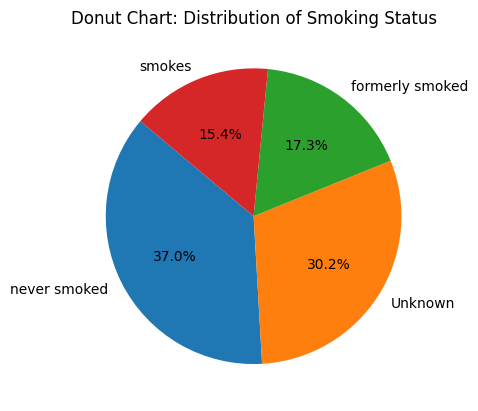

In [20]:
# Donut Chart: Distribution of Smoking Status

#The donut chart shows that the largest proportion of individuals in the dataset have never smoked (37%),
#  followed by Unknown (30.2%), formerly smoked (17.3%), and smokes (15.4%).

smoking_counts = data['smoking_status'].value_counts()
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Donut Chart: Distribution of Smoking Status')
plt.show()

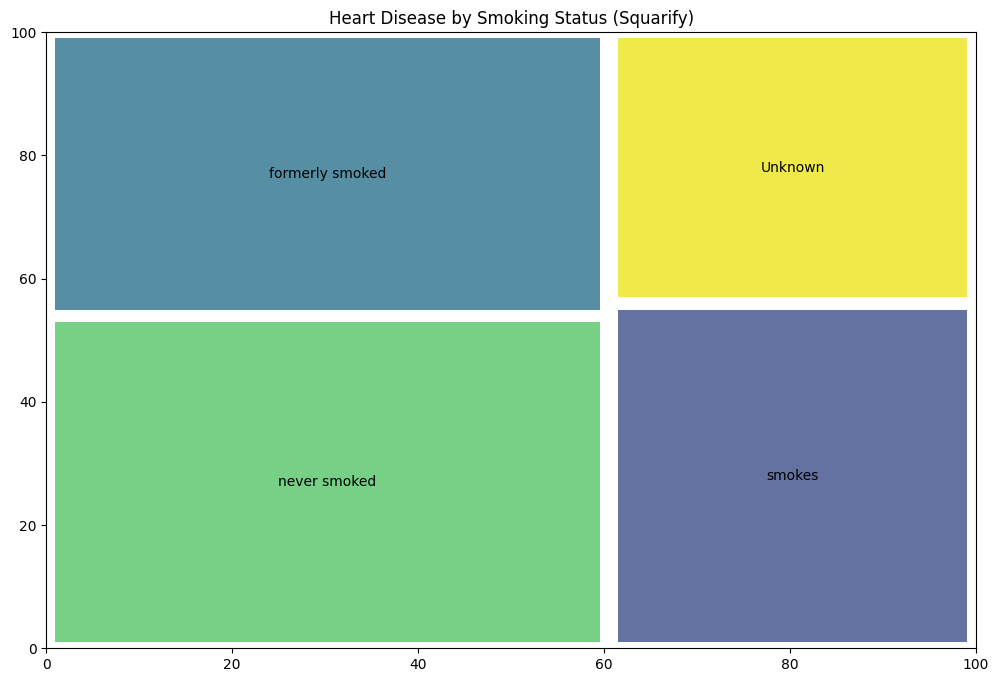

In [43]:
import squarify
import matplotlib.pyplot as plt

#The treemap shows that the highest proportion of heart disease cases occur in the "never smoked" category,
#  followed by "smokes", "formerly smoked", and "Unknown".

residence_type_groups = data.groupby('Residence_type')['heart_disease'].sum().sort_values(ascending=False)
smoking_status_groups = data.groupby('smoking_status')['heart_disease'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
squarify.plot(smoking_status_groups.values, label=smoking_status_groups.index, alpha=0.8, pad=1)
plt.title('Heart Disease by Smoking Status (Squarify)')
plt.show()

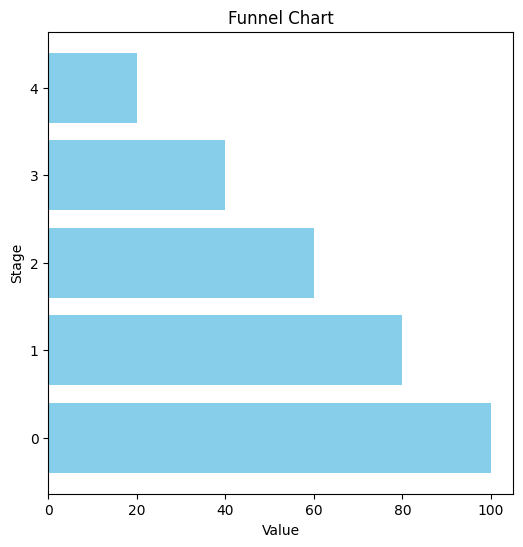

In [50]:
# Funnel Chart (using Matplotlib)
#The funnel chart shows a decreasing trend in values across the stages,
#  with the largest value at stage 0 and the smallest value at stage 4. 
# This suggests a potential drop-off or conversion rate decrease as individuals progress through the stages.


funnel_data = [100, 80, 60, 40, 20]
plt.figure(figsize=(6, 6))
plt.barh(range(len(funnel_data)), funnel_data, color='skyblue')
plt.xlabel('Value')
plt.ylabel('Stage')
plt.title('Funnel Chart')
plt.show()